In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"Downloads\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

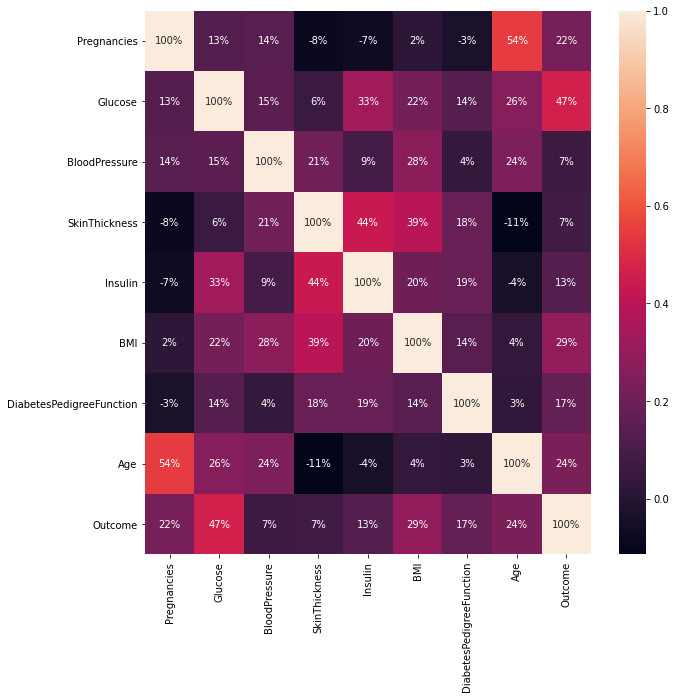

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

In [9]:
x=data.iloc[:,:8].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
y=data.iloc[:,8]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train_f,x_test,y_train_f,y_test=train_test_split(x,y,test_size=0.10,random_state=0)

In [12]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_f,y_train_f,test_size=0.10,random_state=0)

In [13]:
x_train.shape

(621, 8)

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
#using neural network
modell =keras.models.Sequential()
modell.add(keras.layers.Dense(10, input_dim=x_train.shape[1], activation='relu', kernel_initializer='he_normal'))
modell.add(keras.layers.Dense(10))
modell.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
modell.compile(loss="binary_crossentropy",
             optimizer=keras.optimizers.Adam(lr=1e-5,clipnorm=0.001),
             metrics=['accuracy'])

In [18]:
modell.fit(x_train, y_train, epochs=150, verbose=1,validation_data=(x_valid,y_valid),batch_size=9)

Epoch 1/150
69/69 [==============================] - 0s 3ms/step - loss: 129.7511 - accuracy: 0.6490 - val_loss: 127.1407 - val_accuracy: 0.6571
Epoch 2/150
69/69 [==============================] - 0s 1ms/step - loss: 128.4092 - accuracy: 0.6490 - val_loss: 125.8261 - val_accuracy: 0.6571
Epoch 3/150
69/69 [==============================] - 0s 1ms/step - loss: 127.0855 - accuracy: 0.6490 - val_loss: 124.5184 - val_accuracy: 0.6571
Epoch 4/150
69/69 [==============================] - 0s 1ms/step - loss: 125.8018 - accuracy: 0.6490 - val_loss: 123.2248 - val_accuracy: 0.6571
Epoch 5/150
69/69 [==============================] - 0s 1ms/step - loss: 124.4488 - accuracy: 0.6490 - val_loss: 121.9273 - val_accuracy: 0.6571
Epoch 6/150
69/69 [==============================] - 0s 1ms/step - loss: 123.1516 - accuracy: 0.6490 - val_loss: 120.6109 - val_accuracy: 0.6571
Epoch 7/150
69/69 [==============================] - 0s 1ms/step - loss: 121.8548 - accuracy: 0.6490 - val_loss: 119.3234 - val_ac

In [19]:
testt=modell.evaluate(x_test,y_test)

3/3 [==============================] - 0s 0s/step - loss: 5.1025 - accuracy: 0.6104


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train_ff= st_x.fit_transform(x_train_f)    
x_test_ff= st_x.transform(x_test)  

In [22]:
#using random forest
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train_ff, y_train_f)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [23]:
y_pred= classifier.predict(x_test_ff)  

In [24]:
accuracy_score(y_pred,y_test)

0.8181818181818182

In [25]:
#using knn classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier_1= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=10 )  
classifier_1.fit(x_train_ff, y_train_f)  
y_pred_knn= classifier_1.predict(x_test_ff)  
accuracy_score(y_pred_knn,y_test)

0.7402597402597403

In [26]:
#using Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)
ada_clf.fit(x_train_f,y_train_f)
accuracy_score(y_test,ada_clf.predict(x_test))

0.8181818181818182

In [27]:
#using gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier
glb_clf=GradientBoostingClassifier(learning_rate=0.03,n_estimators=4000,max_depth=1)
glb_clf.fit(x_train_f,y_train_f)
accuracy_score(y_test,glb_clf.predict(x_test))

0.7922077922077922

In [28]:
from sklearn.model_selection import GridSearchCV
rf_tree=RandomForestClassifier(n_estimators=250,random_state=42)
params_grid={"max_features":[4,5,6,7,8,9]}
grid_search=GridSearchCV(rf_tree,params_grid,n_jobs=-1,cv=5,scoring='accuracy')
grid_search.fit(x_train_f,y_train_f)


C:\Users\ragav\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.77423626 0.75541654 0.76122406 0.76266291 0.76844959        nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1, param_grid={'max_features': [4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [29]:
grid_search.best_params_
cvrl_clf=grid_search.best_estimator_
accuracy_score(y_test,cvrl_clf.predict(x_test))

0.8051948051948052